## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. we have to focus on a **high recall in order to detect actual fraudulent transactions.**

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import model selection techniques
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

#Import 'LogisticRegression'
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score , roc_curve, auc, f1_score, precision_recall_curve

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC, LinearSVC 

#import oversampling techniques
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier


c:\program files\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Exploratory data analysis


##Import data 

In [2]:

#importing data
#from google.colab import drive
#drive.mount('/content/gdrive')
#df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard.csv')


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
#create the different dataframes for nomal and fraud data
df_normal = df[df.Class==0]
df_fraud = df[df.Class==1]

normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [5]:
# share of normal and fraudulent transactions

print('Normal:',normal_share)
print('Fraudulent:',fraud_share)

Normal: 99.82725143693798
Fraudulent: 0.1727485630620034


In [6]:
#check the distribution of class variable
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

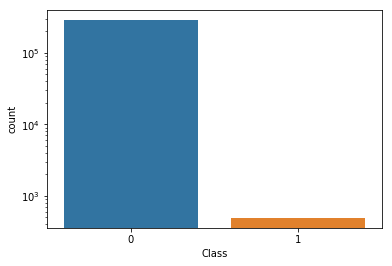

In [7]:
# Bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class',data=df)
plt.yscale('log')
plt.show()

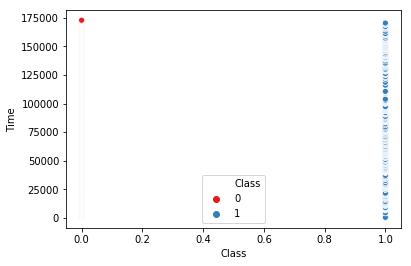

In [173]:
#plot the distribution of class and time variable
sns.scatterplot(x='Class',y='Time',hue='Class',legend='full',data=df, palette = 'Set1')

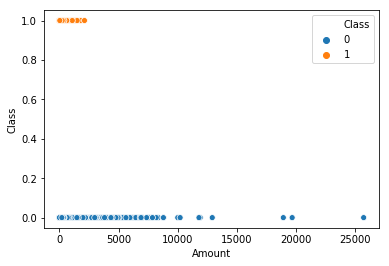

In [176]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Amount',y='Class',hue = 'Class', data=df)  

In [177]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [178]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [179]:
df[df.Class==0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [180]:
print("Fraud Cases : {}".format(len(df_fraud)))
print("Valid Cases : {}".format(len(df_normal)))

Fraud Cases : 492
Valid Cases : 284315


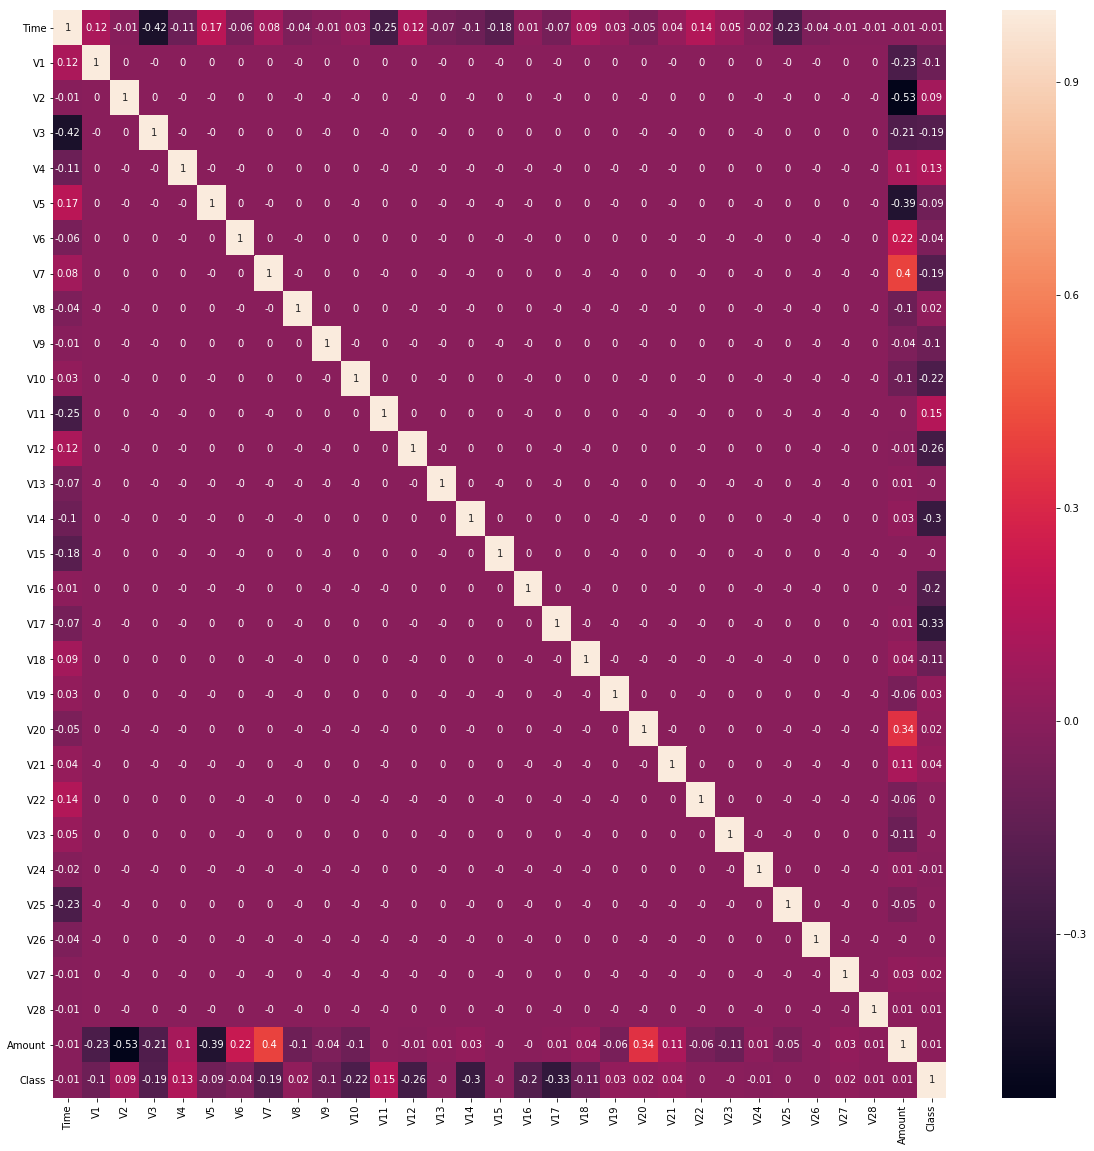

In [181]:
#plot correlation between different variables
fig=plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2), annot =True)

In [6]:
#splitting input and target variables into x and y
y=  df['Class'] #class variable
X=df.drop('Class',axis=1)

In [7]:
#split the data into train and test samples
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,stratify=y,train_size=0.75,random_state=100)

## plotting histogram

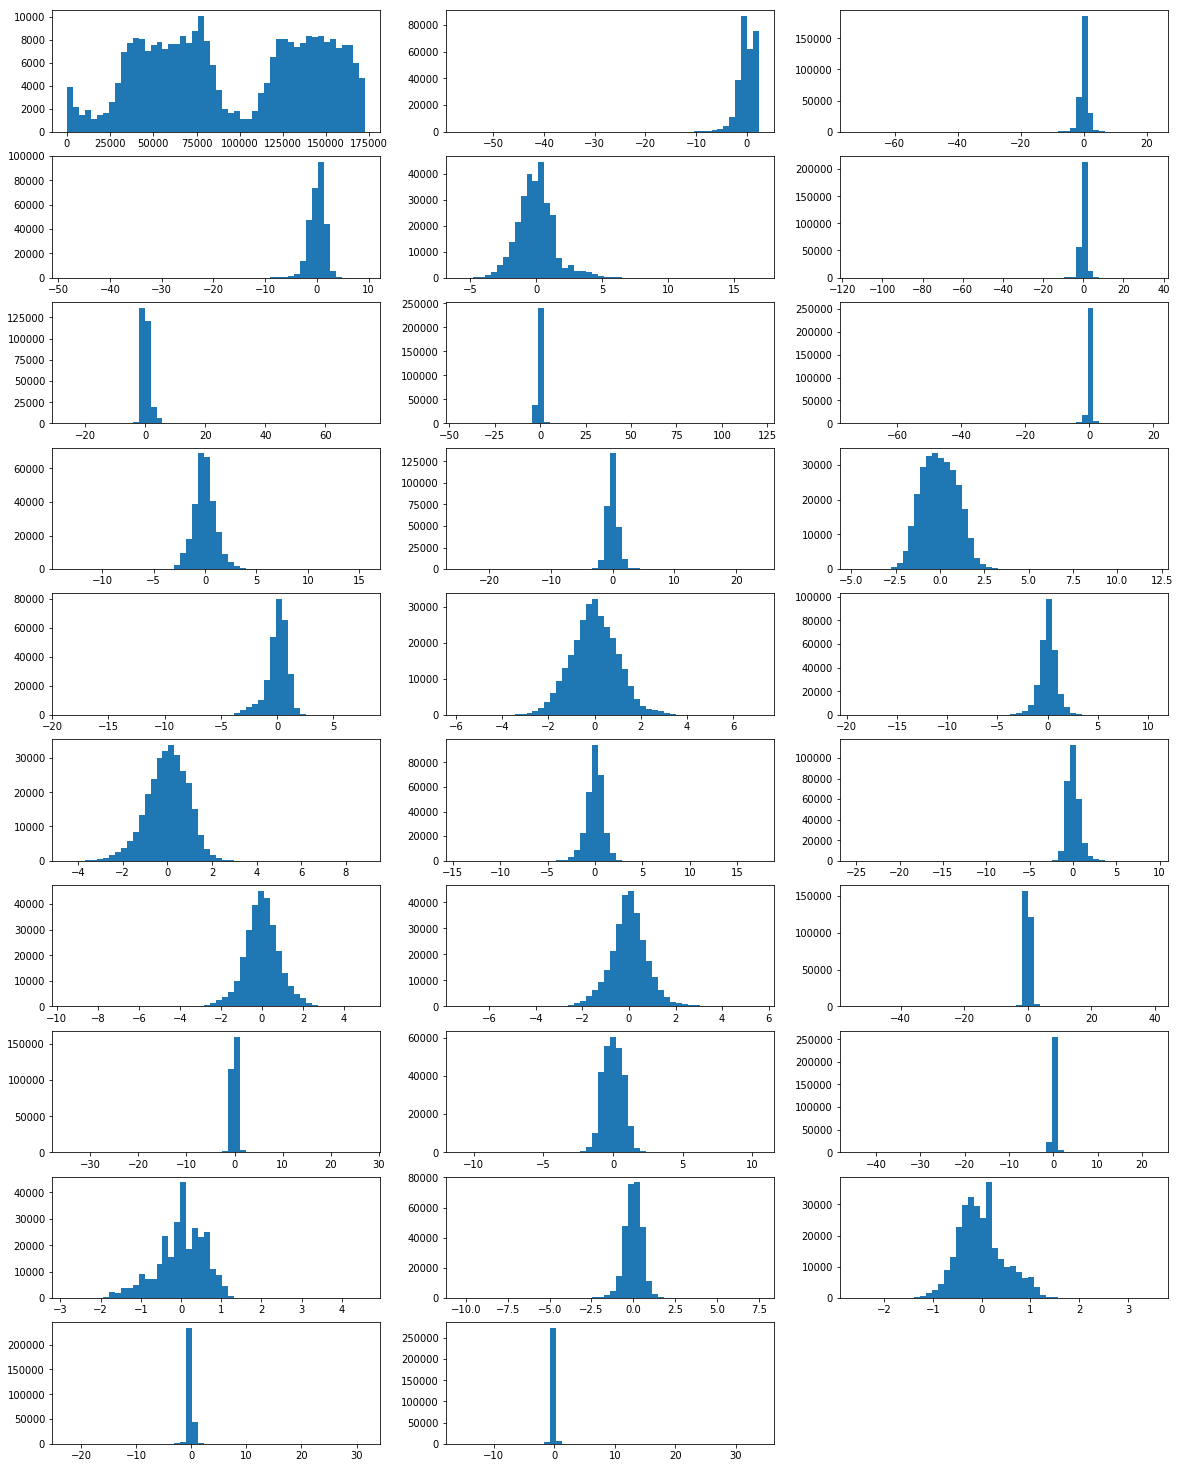

In [8]:
# plot the histogram of a variable from the dataset to see the skewness
fig=plt.figure(figsize=(20,80))

#plt.subplots(6,6)
for i in range(1,30):
    plt.subplot(30,3,i)
   # plt.subplot()
    plt.xticks()
    plt.hist(df[df.columns[i-1]],bins=50)

In [8]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt=preprocessing.PowerTransformer()
pt.fit(X_train)
X_train_nor=pt.transform(X_train)
X_test_nor=pt.transform(X_test)

In [10]:
X_train_nor.shape

(213605, 30)

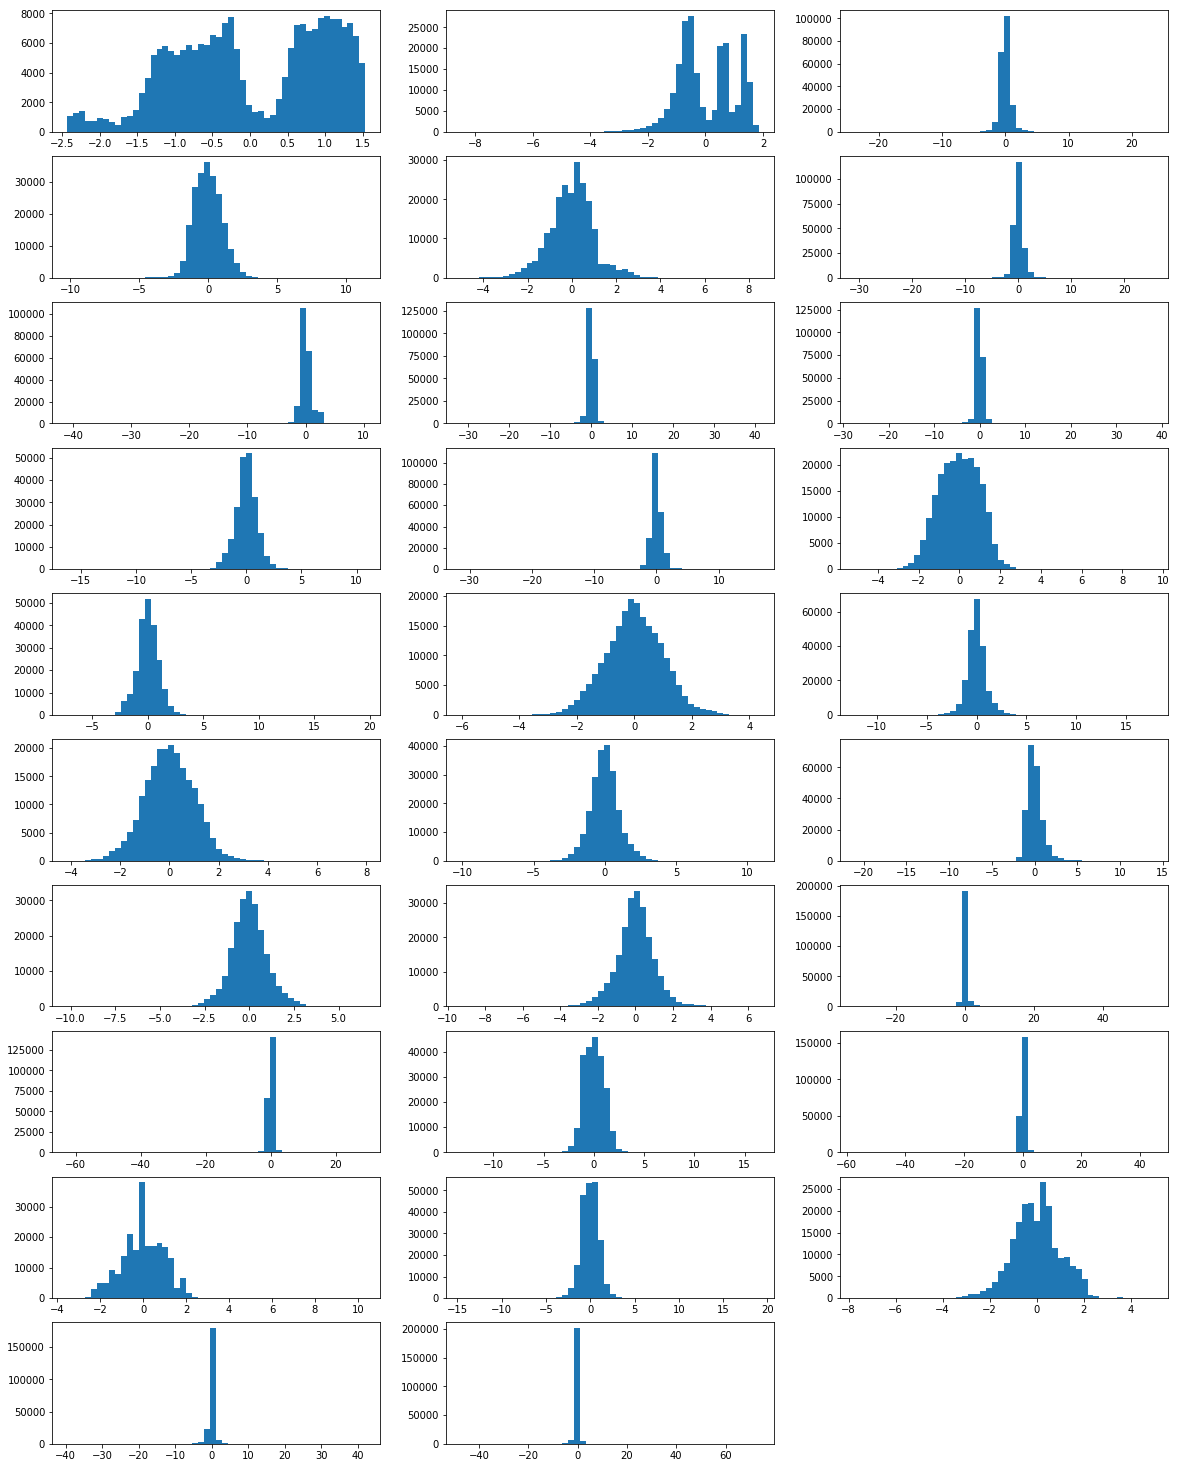

In [187]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness
fig=plt.figure(figsize=(20,80))

#plt.subplots(6,6)
for i in range(1,30):
    plt.subplot(30,3,i)
   # plt.subplot()
    plt.xticks()
    plt.hist(X_train_nor[:,i-1],bins=50)
    #plt.shoW()

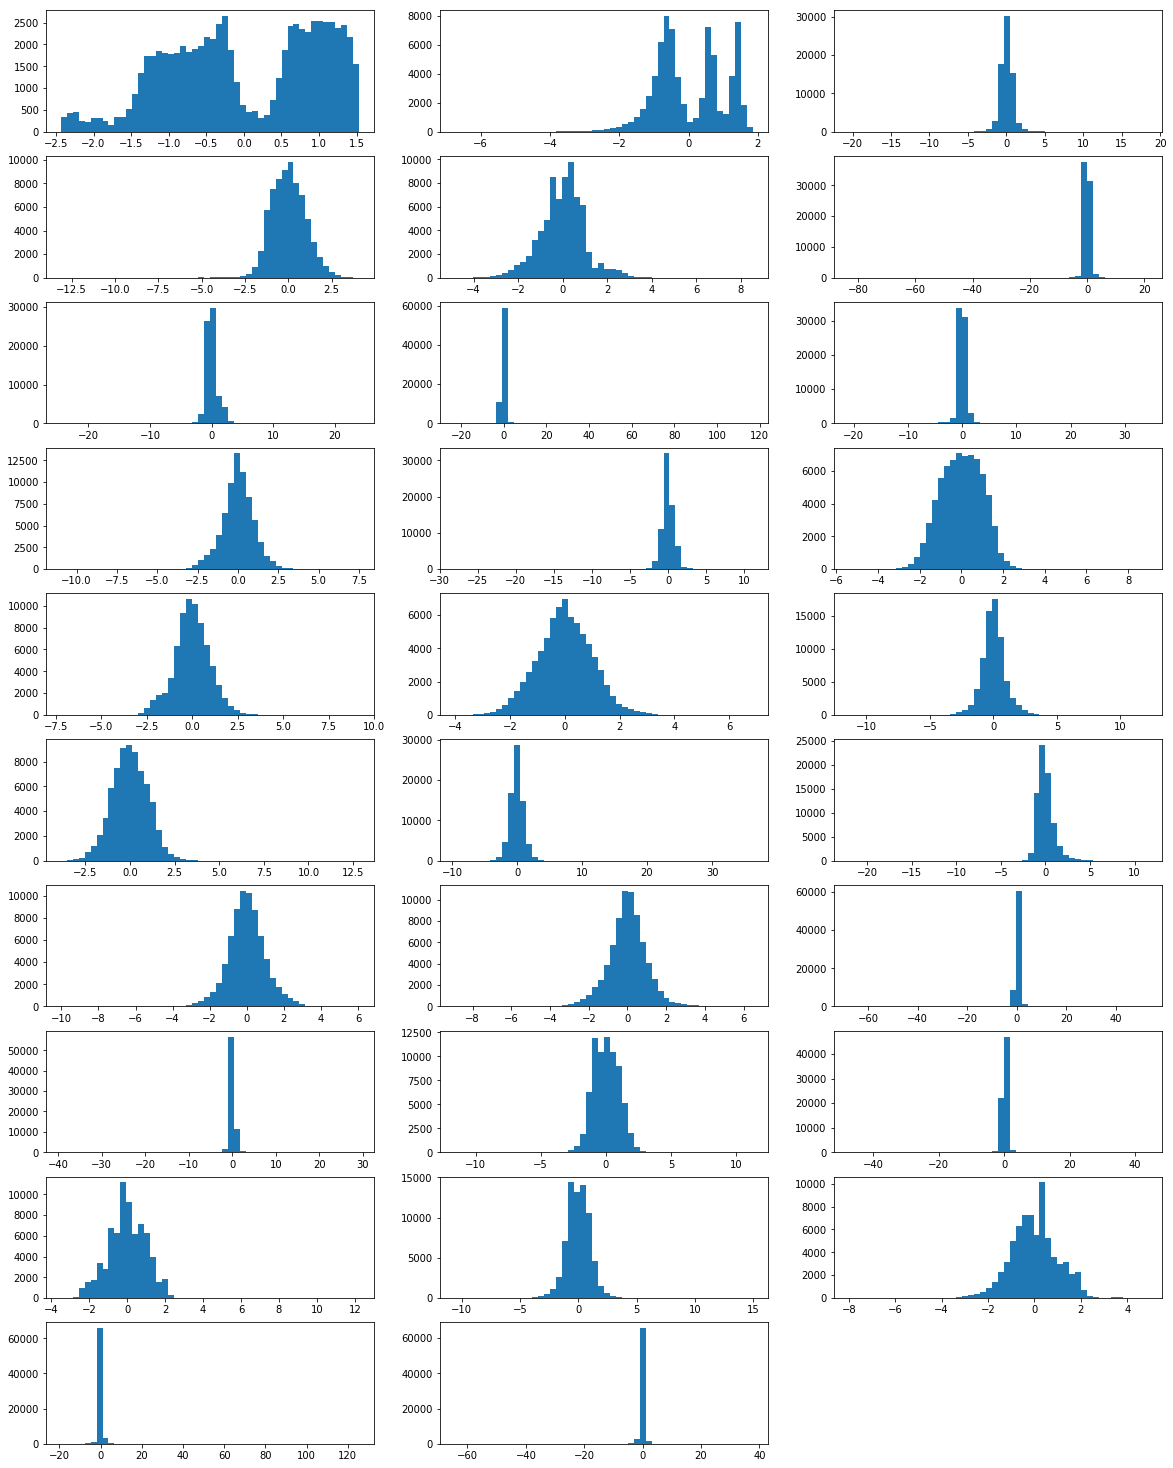

In [188]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness
fig=plt.figure(figsize=(20,80))

#plt.subplots(6,6)
for i in range(1,30):
    plt.subplot(30,3,i)
   # plt.subplot()
    plt.xticks()
    plt.hist(X_test_nor[:,i-1],bins=50)
    #plt.shoW()

## Logistic regression

In [253]:
# create a LogisticRegression object

logreg = LogisticRegression()

rfe = RFE(logreg, 5)             # running RFE with 5 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False False False  True False False False False False  True False
 False False  True False False False False False False  True  True False
 False False False False False False]
[26 17 23 20  1 12 16 22  5 11  1 13 19  2  1  7  3 15 21 18  9  1  1 14
  4  6 25  8 10 24]


In [254]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Time', False, 26),
 ('V1', False, 17),
 ('V2', False, 23),
 ('V3', False, 20),
 ('V4', True, 1),
 ('V5', False, 12),
 ('V6', False, 16),
 ('V7', False, 22),
 ('V8', False, 5),
 ('V9', False, 11),
 ('V10', True, 1),
 ('V11', False, 13),
 ('V12', False, 19),
 ('V13', False, 2),
 ('V14', True, 1),
 ('V15', False, 7),
 ('V16', False, 3),
 ('V17', False, 15),
 ('V18', False, 21),
 ('V19', False, 18),
 ('V20', False, 9),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 14),
 ('V24', False, 4),
 ('V25', False, 6),
 ('V26', False, 25),
 ('V27', False, 8),
 ('V28', False, 10),
 ('Amount', False, 24)]

In [255]:
# Getting the predicted values on the train set
y_train_pred = rfe.predict(X_train)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [256]:
# Getting the predicted values on the test set
y_test_pred = rfe.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [257]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_train, y_train_pred)
confusion

array([[213187,     49],
       [   143,    226]], dtype=int64)

In [258]:
print("Precision on train: ",precision_score(y_train, y_train_pred))

print("Recall on train: ",recall_score(y_train, y_train_pred))

print("Precision on test: ",precision_score(y_test, y_test_pred))

print("Recall on test: ",recall_score(y_test, y_test_pred))

print("F1 score on train: ",f1_score(y_train, y_train_pred))

print("F1 score on test: ",f1_score(y_test, y_test_pred))

Precision on train:  0.8218181818181818
Recall on train:  0.6124661246612466
Precision on test:  0.7446808510638298
Recall on test:  0.5691056910569106
F1 score on train:  0.701863354037267
F1 score on test:  0.6451612903225806


For the logistic regression with 5 features precision is quite good for train data but recall is not so good for train and test data. Let's try another model.

In [259]:
y_train_pred_proba = rfe.predict_proba(X_train_nor)
y_train_pred = rfe.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [260]:
y_train_pred_df['Predicted']=y_train_pred

In [261]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000075,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000507,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000163,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000623,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000175,0,1,0,0,0,0,0,0,0,0,0


In [262]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001727  1.000000  0.000000
0.1   0.1  0.999265  0.680217  0.999817
0.2   0.2  0.999218  0.617886  0.999878
0.3   0.3  0.999148  0.571816  0.999887
0.4   0.4  0.999050  0.514905  0.999887
0.5   0.5  0.999003  0.487805  0.999887
0.6   0.6  0.998970  0.460705  0.999902
0.7   0.7  0.998890  0.411924  0.999906
0.8   0.8  0.998820  0.363144  0.999920
0.9   0.9  0.998741  0.308943  0.999934


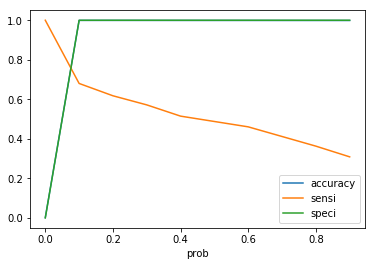

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [264]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.05 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000075,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000507,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000163,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000623,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000175,0,1,0,0,0,0,0,0,0,0,0,0


In [265]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.8099415204678363

In [266]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.7506775067750677

In [267]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.7791842475386779

In [268]:
y_test_pred_proba = rfe.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [269]:
y_test_pred_proba[:,1]

array([1.50448955e-03, 9.99452464e-05, 1.83885460e-04, ...,
       2.76131498e-04, 7.99328190e-04, 4.09468319e-04])

In [270]:
y_test_predicted=[1 if x>0.05 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [271]:
precision_score(y_test_predicted,y_test)

0.7235772357723578

In [272]:
recall_score(y_test_predicted,y_test)

0.7739130434782608

In [273]:
f1_score(y_test_predicted,y_test)

0.7478991596638654

In [274]:
#Lets build another logistic regression with top 15 features

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[False False False False  True False False False  True  True  True False
 False  True  True  True  True False False False  True  True  True False
  True  True False  True  True False]
[16  7 13 10  1  2  6 12  1  1  1  3  9  1  1  1  1  5 11  8  1  1  1  4
  1  1 15  1  1 14]


[('Time', False, 16),
 ('V1', False, 7),
 ('V2', False, 13),
 ('V3', False, 10),
 ('V4', True, 1),
 ('V5', False, 2),
 ('V6', False, 6),
 ('V7', False, 12),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', False, 3),
 ('V12', False, 9),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', False, 5),
 ('V18', False, 11),
 ('V19', False, 8),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 4),
 ('V24', True, 1),
 ('V25', True, 1),
 ('V26', False, 15),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', False, 14)]

In [275]:
# Getting the predicted values on the train set
y_train_pred = rfe.predict(X_train)
y_train_pred[:10]



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [276]:
# Getting the predicted values on the test set
y_test_pred = rfe.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [277]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train, y_train_pred)

0.9992603169401465

In [278]:
print("Precision on train: ",precision_score(y_train, y_train_pred))

print("Recall on train: ",recall_score(y_train, y_train_pred))

print("Precision on test: ",precision_score(y_test, y_test_pred))

print("Recall on test: ",recall_score(y_test, y_test_pred))

print("F1 score on train: ",f1_score(y_train, y_train_pred))

print("F1 score on test: ",f1_score(y_test, y_test_pred))

Precision on train:  0.8951310861423221
Recall on train:  0.6476964769647696
Precision on test:  0.8470588235294118
Recall on test:  0.5853658536585366
F1 score on train:  0.7515723270440252
F1 score on test:  0.6923076923076923


In [279]:
y_train_pred_proba = rfe.predict_proba(X_train_nor)
y_train_pred = rfe.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [280]:
y_train_pred_df['Predicted']=y_train_pred

In [281]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000149,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000427,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000190,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000498,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000095,0,1,0,0,0,0,0,0,0,0,0


In [282]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001727  1.000000  0.000000
0.1   0.1  0.999204  0.680217  0.999756
0.2   0.2  0.999139  0.609756  0.999812
0.3   0.3  0.999096  0.560976  0.999855
0.4   0.4  0.999031  0.514905  0.999869
0.5   0.5  0.998979  0.479675  0.999878
0.6   0.6  0.998942  0.452575  0.999887
0.7   0.7  0.998900  0.420054  0.999902
0.8   0.8  0.998844  0.373984  0.999925
0.9   0.9  0.998811  0.344173  0.999944


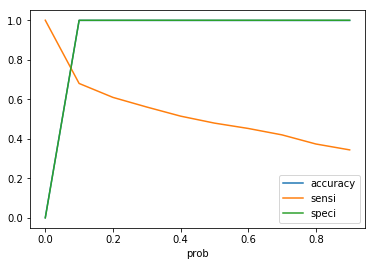

In [283]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [284]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.05 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000149,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000427,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000190,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000498,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000095,0,1,0,0,0,0,0,0,0,0,0,0


In [285]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.7824858757062146

In [286]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.7506775067750677

In [287]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.7662517289073306

In [288]:
y_test_pred_proba = rfe.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [289]:
y_test_pred_proba[:,1]

array([0.0007018 , 0.00018463, 0.00016488, ..., 0.00019002, 0.00090152,
       0.00014053])

In [302]:
y_test_predicted=[1 if x>0.05 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [303]:
precision_score(y_test_predicted,y_test)

0.7073170731707317

In [304]:
recall_score(y_test_predicted,y_test)

0.7073170731707317

In [305]:
f1_score(y_test_predicted,y_test)

0.7073170731707317

With 15 features in logistic regression recall is improved

In [306]:
## logistic regression with data as it is, stratified kfold

y_train1=np.array(y_train)
y_train1

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,precision_score,recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True ,random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X_train_nor,y_train1):
    
    #print("Train:", train_index, "Validation:", test_index) 
    
    X_train_str, X_test_str = X_train_nor[train_index], X_train_nor[test_index] 
    #print(" ***train***",X_train_str)
    y_train_str, y_test_str = y_train1[train_index], y_train1[test_index]
    #print("*** test *****",y_train_str)

        
    logreg=LogisticRegression()
    logreg.fit(X_train_str,y_train_str)
    y_train_pred=logreg.predict(X_train_str)
    y_pred=logreg.predict(X_test_str)
    
    score = roc_auc_score(y_test_str,y_pred)
    print('ROC AUC score:',score)
    confusion = metrics.confusion_matrix(y_test_str, y_pred )
    print("confusion matrix test :\n ",confusion)
    print("precision score train : ",precision_score(y_train_str, y_train_pred))
    print("recall score  train : ",recall_score(y_train_str, y_train_pred))
    print("precision score test : ",precision_score(y_test_str, y_pred))
    print("recall score  test : ",recall_score(y_test_str, y_pred),"\n")
    #fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )


ROC AUC score: 0.8355460950809814
confusion matrix test :
  [[42642     6]
 [   24    49]]
precision score train :  0.8859649122807017
recall score  train :  0.6824324324324325
precision score test :  0.8909090909090909
recall score  test :  0.6712328767123288 

ROC AUC score: 0.8580494873375968
confusion matrix test :
  [[42642     5]
 [   21    53]]
precision score train :  0.8849557522123894
recall score  train :  0.6779661016949152
precision score test :  0.9137931034482759
recall score  test :  0.7162162162162162 

ROC AUC score: 0.7904819197700291
confusion matrix test :
  [[42642     5]
 [   31    43]]
precision score train :  0.8864628820960698
recall score  train :  0.688135593220339
precision score test :  0.8958333333333334
recall score  test :  0.581081081081081 

ROC AUC score: 0.8647476233238421
confusion matrix test :
  [[42637    10]
 [   20    54]]
precision score train :  0.8982300884955752
recall score  train :  0.688135593220339
precision score test :  0.84375
recal

In [308]:
y_train_pred_proba = logreg.predict_proba(X_train_nor)
y_train_pred = logreg.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_Prob':list(y_train_pred_proba[:,1])})

In [309]:
y_train_pred_df['Predicted']=y_train_pred

In [310]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000054,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000191,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000025,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000194,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000252,0,1,0,0,0,0,0,0,0,0,0


In [311]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001727  1.000000  0.000000
0.1   0.1  0.999288  0.813008  0.999611
0.2   0.2  0.999345  0.772358  0.999737
0.3   0.3  0.999345  0.734417  0.999803
0.4   0.4  0.999302  0.696477  0.999826
0.5   0.5  0.999288  0.674797  0.999850
0.6   0.6  0.999256  0.642276  0.999873
0.7   0.7  0.999209  0.607046  0.999887
0.8   0.8  0.999153  0.571816  0.999892
0.9   0.9  0.999050  0.512195  0.999892


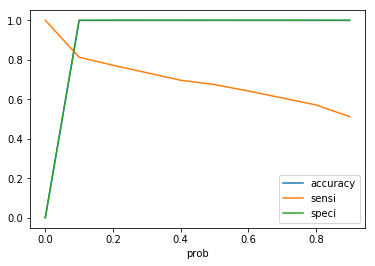

In [312]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [348]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_Prob.map( lambda x: 1 if x > 0.14 else 0)

y_train_pred_df.head()

,Actual,Fraud_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000054,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000191,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000025,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000194,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000252,0,1,0,0,0,0,0,0,0,0,0,0


In [349]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.804945054945055

In [350]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.7940379403794038

In [351]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.7994542974079126

In [352]:
y_test_pred_proba = logreg.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [353]:
y_test_pred_proba[:,1]

array([2.94908622e-04, 9.71796249e-05, 1.17266325e-04, ...,
       8.30966599e-05, 6.35180526e-04, 2.75528241e-04])

In [386]:
y_test_predicted=[1 if x>0.14 else 0 for x in y_test_pred_proba[:,1]]


In [355]:
precision_score(y_test_predicted,y_test)

0.7479674796747967

In [356]:
recall_score(y_test_predicted,y_test)

0.7603305785123967

In [357]:
f1_score(y_test_predicted,y_test)

0.7540983606557377

When we used stratified K fold with logistic regression precision and recall are good on both train and test data

## 2. KNN

[[ 1.43493146  1.41040954 -0.14752754 ... -0.06407833 -0.13866519
  -0.1263806 ]
 [ 0.54487076 -0.67752498 -0.33943543 ... -0.27359075  0.63286802
   1.76655333]
 [-0.59745449 -0.83569154  0.76147532 ... -0.37964519 -1.12969262
  -0.32646969]
 ...
 [-1.07270023  0.4495895  -0.65674209 ...  0.09530028  0.20632715
   1.18904496]
 [-0.18625298  0.22130388 -0.9891997  ... -0.18823841  0.24978116
   1.56393611]
 [-2.41545381 -0.45471991  0.76215743 ... -0.11691614 -1.54123544
  -1.31647163]]


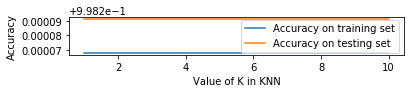

[[ 1.43493146  1.41040954 -0.14752754 ... -0.06407833 -0.13866519
  -0.1263806 ]
 [ 0.54487076 -0.67752498 -0.33943543 ... -0.27359075  0.63286802
   1.76655333]
 [-0.59745449 -0.83569154  0.76147532 ... -0.37964519 -1.12969262
  -0.32646969]
 ...
 [ 0.48589233 -0.6789589  -0.48548186 ... -0.71642751 -1.48139425
   0.89772055]
 [-0.18625298  0.22130388 -0.9891997  ... -0.18823841  0.24978116
   1.56393611]
 [-2.41545381 -0.45471991  0.76215743 ... -0.11691614 -1.54123544
  -1.31647163]]


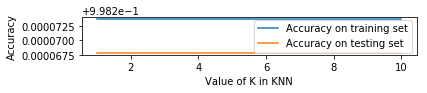

[[ 1.43493146  1.41040954 -0.14752754 ... -0.06407833 -0.13866519
  -0.1263806 ]
 [-0.59745449 -0.83569154  0.76147532 ... -0.37964519 -1.12969262
  -0.32646969]
 [ 1.2792424   1.2078584  -0.52847294 ... -0.12057143 -0.14332464
   0.69137913]
 ...
 [ 0.48589233 -0.6789589  -0.48548186 ... -0.71642751 -1.48139425
   0.89772055]
 [-1.07270023  0.4495895  -0.65674209 ...  0.09530028  0.20632715
   1.18904496]
 [-2.41545381 -0.45471991  0.76215743 ... -0.11691614 -1.54123544
  -1.31647163]]


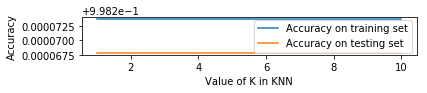

[[ 1.43493146  1.41040954 -0.14752754 ... -0.06407833 -0.13866519
  -0.1263806 ]
 [ 0.54487076 -0.67752498 -0.33943543 ... -0.27359075  0.63286802
   1.76655333]
 [ 1.2792424   1.2078584  -0.52847294 ... -0.12057143 -0.14332464
   0.69137913]
 ...
 [-1.07270023  0.4495895  -0.65674209 ...  0.09530028  0.20632715
   1.18904496]
 [-0.18625298  0.22130388 -0.9891997  ... -0.18823841  0.24978116
   1.56393611]
 [-2.41545381 -0.45471991  0.76215743 ... -0.11691614 -1.54123544
  -1.31647163]]


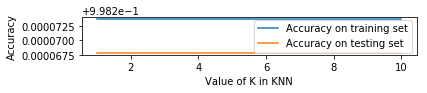

[[ 0.54487076 -0.67752498 -0.33943543 ... -0.27359075  0.63286802
   1.76655333]
 [-0.59745449 -0.83569154  0.76147532 ... -0.37964519 -1.12969262
  -0.32646969]
 [ 1.2792424   1.2078584  -0.52847294 ... -0.12057143 -0.14332464
   0.69137913]
 ...
 [ 0.48589233 -0.6789589  -0.48548186 ... -0.71642751 -1.48139425
   0.89772055]
 [-1.07270023  0.4495895  -0.65674209 ...  0.09530028  0.20632715
   1.18904496]
 [-0.18625298  0.22130388 -0.9891997  ... -0.18823841  0.24978116
   1.56393611]]


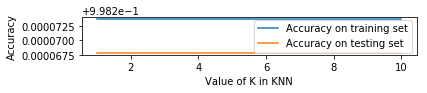

In [389]:
from sklearn.neighbors import KNeighborsClassifier

y_train1=np.array(y_train)
y_train1
i=1
for train_index, test_index in skf.split(X_train_nor,y_train1):
    
    X_train_str, X_test_str = X_train_nor[train_index], X_train_nor[test_index] 

    y_train_str, y_test_str = y_train1[train_index], y_train1[test_index]
    print(X_train_str)

    score1=[]
    score2=[]

    k_range = range(1, 11)
    
    for k in k_range:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        score1.append(knn.score(X_train_str,y_train_str))
        score2.append(knn.score(X_test_str,y_test_str))
    fig=
    plt.subplot(5,1,i)
    
    plt.plot(k_range,score1,label= 'Accuracy on training set')
    plt.plot(k_range,score2,label= 'Accuracy on testing set')
    plt.xlabel('Value of K in KNN')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 
    i=i+1

#%matplotlib inline


In [ ]:

k_range = range(1, 10000,1000)
score1=[]
score2=[]
for k in k_range:
    print(k)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    tr=knn.score(X_train_nor,y_train)
    ts=knn.score(X_test_nor,y_test)

    print(tr)
    print(ts)
    score1.append(tr)
    score2.append(ts)
    
    
# cv_scores = [ ]
# #perform 10-fold cross-validation
# for K in k_range:
#     knn = KNeighborsClassifier(n_neighbors = K)
#     scores = cross_val_score(knn,X_train_nor,y_train,cv = 10,scoring =
#     "accuracy")
#     print(scores.mean())
#     cv_scores.append(scores.mean())
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

1
0.9982725123475574
0.9982725204348193
1001
0.9982725123475574
0.9982725204348193
2001


In [391]:
score1

[0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574,
 0.9982725123475574]

## Decision Tree

In [11]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_nor, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test_nor)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.77      0.84       123

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [13]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))

[[71070     9]
 [   28    95]]
0.9994803516755147
0.7723577235772358
0.9134615384615384


from the above score we can see that even though the accuracy and precision are good recall is very low so we cannot consider this model. Let's try some more models

In [14]:
y_train_pred_proba = dt_default.predict_proba(X_train_nor)
y_train_pred = dt_default.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [15]:
y_train_pred_df['Predicted']=y_train_pred

In [27]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.02,0.04,0.06,0.08,0.12,0.14,0.16,0.18,final_predicted
0,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.002350  1.000000  0.000624
0.1   0.1  0.999541  0.845528  0.999808
0.2   0.2  0.999621  0.837398  0.999902
0.3   0.3  0.999621  0.837398  0.999902
0.4   0.4  0.999621  0.837398  0.999902
0.5   0.5  0.999621  0.826558  0.999920
0.6   0.6  0.999621  0.826558  0.999920
0.7   0.7  0.999621  0.826558  0.999920
0.8   0.8  0.999621  0.826558  0.999920
0.9   0.9  0.999522  0.758808  0.999939


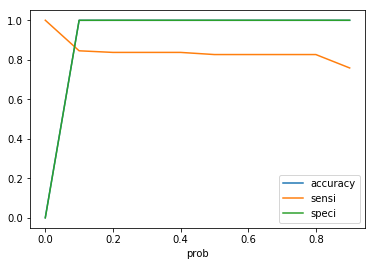

In [29]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [69]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.02,0.04,0.06,0.08,0.12,0.14,0.16,0.18,final_predicted
0,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000134,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.8838526912181303

In [71]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.8455284552845529

In [72]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.8642659279778394

In [73]:
y_test_pred_proba = dt_default.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [48]:
y_test_pred_proba[:,1]

array([0.00013374, 0.00013374, 0.00013374, ..., 0.00013374, 0.00013374,
       0.00013374])

In [61]:
y_test_predicted=[1 if x>0.2 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [62]:
precision_score(y_test_predicted,y_test)

0.7723577235772358

In [63]:
recall_score(y_test_predicted,y_test)

0.8962264150943396

In [64]:
f1_score(y_test_predicted,y_test)

0.8296943231441049

In [67]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

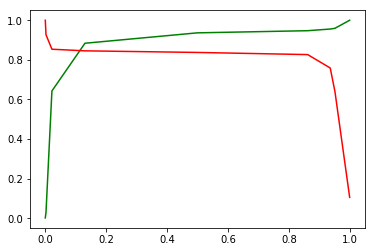

In [68]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the recall and F1 score on test data we can say that this is quite good model to consider.

In [74]:
# GridSearchCV to find optimal max_depth

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_nor,y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 11.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [75]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.928034,0.232393,0.006451,0.006014,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999087,0.999368,0.999228,0.999345,0.999204,0.999246,0.000102,1
1,6.722391,0.115966,0.009170,0.005056,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999087,0.999368,0.999228,0.999345,0.999204,0.999246,0.000102,1
2,6.651974,0.076463,0.007796,0.004000,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.998876,0.998923,0.999228,0.999111,0.998970,0.999022,0.000129,13
3,6.558428,0.080246,0.010071,0.000034,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.998876,0.998923,0.999228,0.999111,0.998970,0.999022,0.000129,13
4,9.457242,0.512477,0.011200,0.002210,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999087,0.999368,0.999228,0.999345,0.999204,0.999246,0.000102,1


In [76]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.999246272325086
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [80]:
dt_grid = grid_search.best_estimator_
dt_grid.fit(X_train_nor, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
y_pred = dt_grid.predict(X_test_nor)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.75      0.72      0.73       123

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [82]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))

[[71070     9]
 [   28    95]]
0.9994803516755147
0.7723577235772358
0.9134615384615384


In [83]:
y_train_pred_proba = dt_grid.predict_proba(X_train_nor)
y_train_pred = dt_grid.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [84]:
y_train_pred_df['Predicted']=y_train_pred

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000048,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003353,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000048,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000048,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000048,0,1,0,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.019995  1.000000  0.018299
0.1   0.1  0.999302  0.840108  0.999578
0.2   0.2  0.999302  0.840108  0.999578
0.3   0.3  0.999302  0.840108  0.999578
0.4   0.4  0.999377  0.791328  0.999737
0.5   0.5  0.999377  0.791328  0.999737
0.6   0.6  0.999377  0.791328  0.999737
0.7   0.7  0.999157  0.558266  0.999920
0.8   0.8  0.998970  0.409214  0.999991
0.9   0.9  0.998970  0.409214  0.999991


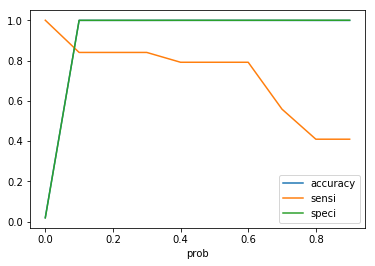

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000048,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.003353,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000048,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000048,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000048,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.775

In [106]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.8401084010840109

In [107]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.8062418725617686

In [110]:
y_test_pred_proba = dt_grid.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [111]:
y_test_pred_proba[:,1]

array([4.79427244e-05, 4.79427244e-05, 4.79427244e-05, ...,
       4.79427244e-05, 4.79427244e-05, 4.79427244e-05])

In [146]:
y_test_predicted=[1 if x>0.15 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [147]:
precision_score(y_test_predicted,y_test)

0.8048780487804879

In [148]:
recall_score(y_test_predicted,y_test)

0.6971830985915493

In [149]:
f1_score(y_test_predicted,y_test)

0.7471698113207547

In [153]:
confusion_matrix(y_test_predicted,y_test)

array([[71036,    24],
       [   43,    99]], dtype=int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

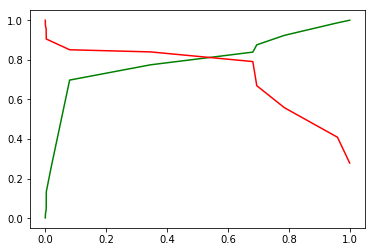

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The recall for this model has dropped below 70 so we can't consider this model.

## 3. Random forest

In [150]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_nor,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
# Making predictions
predictions = rfc.predict(X_test_nor)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.76      0.84       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [152]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))

[[71073     6]
 [   29    94]]
0.9995084407741356
0.7723577235772358
0.9134615384615384


In [154]:
#Grid Search to Find Optimal Hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_nor, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.9min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
grid_search.best_params_

In [11]:
## check this  and add params from best params


# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [12]:
# fit
rfc.fit(X_train_nor,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
# predict
predictions = rfc.predict(X_test_nor)

In [15]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.57      0.67       123

    accuracy                           1.00     71202
   macro avg       0.90      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202

[[71062    17]
 [   53    70]]
0.9990168815482711
0.5691056910569106


In [16]:
y_train_pred_proba = rfc.predict_proba(X_train_nor)
y_train_pred = rfc.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [17]:
y_train_pred_df['Predicted']=y_train_pred

In [18]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000101,0,1,0,0,0,0,0,0,0,0,0
1,0,0.001005,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000102,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000101,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000637,0,1,0,0,0,0,0,0,0,0,0


In [19]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001727  1.000000  0.000000
0.1   0.1  0.998493  0.842818  0.998762
0.2   0.2  0.998951  0.818428  0.999264
0.3   0.3  0.999265  0.772358  0.999658
0.4   0.4  0.999312  0.739837  0.999761
0.5   0.5  0.999204  0.644986  0.999817
0.6   0.6  0.999054  0.531165  0.999864
0.7   0.7  0.998956  0.463415  0.999883
0.8   0.8  0.998628  0.205962  1.000000
0.9   0.9  0.998273  0.000000  1.000000


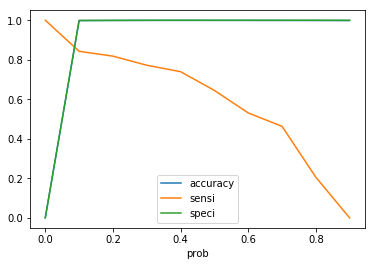

In [20]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [33]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000101,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.001005,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000102,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000101,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000637,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.6189516129032258

In [35]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.8319783197831978

In [36]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.7098265895953757

In [37]:
y_test_pred_proba = rfc.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [38]:
y_test_pred_proba[:,1]

array([0.00010882, 0.00010117, 0.00010063, ..., 0.00010081, 0.0007574 ,
       0.00010249])

In [68]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

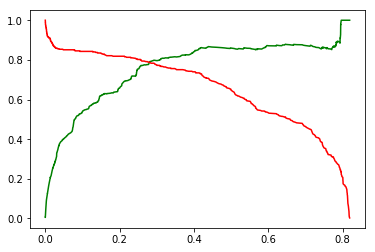

In [45]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:
y_test_predicted=[1 if x>0.28 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [86]:
precision_score(y_test_predicted,y_test)

0.7560975609756098

In [87]:
recall_score(y_test_predicted,y_test)

0.7045454545454546

In [88]:
f1_score(y_test_predicted,y_test)

0.7294117647058823

In [89]:
confusion_matrix(y_test_predicted,y_test)

array([[71040,    30],
       [   39,    93]], dtype=int64)

## XGBoost

In [9]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# generate dataset

# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure

In [10]:
model.fit(X_train_nor,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=99, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [11]:
y_train_pred=model.predict(X_train_nor)

In [12]:
recall_score(y_train_pred,y_train)

1.0

In [14]:
y_test_pred=model.predict(X_test_nor)
print(recall_score(y_test_pred,y_test))

print(precision_score(y_test_pred,y_test))

0.9509803921568627
0.7886178861788617


In [15]:

f1_score(y_test_pred,y_test)

0.8622222222222222

In [17]:
y_train_pred_proba = model.predict_proba(X_train_nor)
y_train_pred = model.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [18]:
y_train_pred_df['Predicted']=y_train_pred

In [19]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.320013e-06,0,1,0,0,0,0,0,0,0,0,0
1,0,2.539967e-06,0,1,0,0,0,0,0,0,0,0,0
2,0,7.788602e-07,0,1,0,0,0,0,0,0,0,0,0
3,0,6.230312e-07,0,1,0,0,0,0,0,0,0,0,0
4,0,2.252232e-05,0,1,0,0,0,0,0,0,0,0,0


In [20]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi     speci
0.0   0.0  0.001727    1.0  0.000000
0.1   0.1  0.999986    1.0  0.999986
0.2   0.2  1.000000    1.0  1.000000
0.3   0.3  1.000000    1.0  1.000000
0.4   0.4  1.000000    1.0  1.000000
0.5   0.5  1.000000    1.0  1.000000
0.6   0.6  1.000000    1.0  1.000000
0.7   0.7  1.000000    1.0  1.000000
0.8   0.8  1.000000    1.0  1.000000
0.9   0.9  1.000000    1.0  1.000000


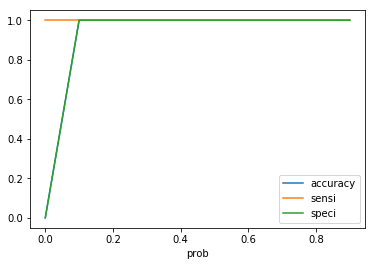

In [21]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [22]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.320013e-06,0,1,0,0,0,0,0,0,0,0,0,0
1,0,2.539967e-06,0,1,0,0,0,0,0,0,0,0,0,0
2,0,7.788602e-07,0,1,0,0,0,0,0,0,0,0,0,0
3,0,6.230312e-07,0,1,0,0,0,0,0,0,0,0,0,0
4,0,2.252232e-05,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
precision_score(y_train,y_train_pred_df['final_predicted'])

1.0

In [24]:
recall_score(y_train,y_train_pred_df['final_predicted'])

1.0

In [25]:
f1_score(y_train,y_train_pred_df['final_predicted'])

1.0

In [26]:
y_test_pred_proba = model.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [27]:
y_test_pred_proba[:,1]

array([3.5696946e-06, 4.6009990e-07, 5.9025621e-07, ..., 1.6572970e-06,
       3.2767166e-05, 1.7319513e-06], dtype=float32)

In [28]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

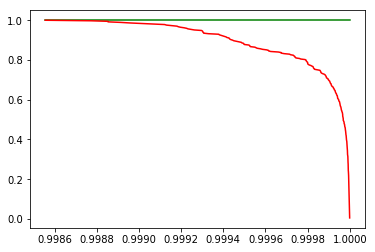

In [29]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [30]:
y_test_predicted=[1 if x>0.28 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [31]:
precision_score(y_test_predicted,y_test)

0.7967479674796748

In [32]:
recall_score(y_test_predicted,y_test)

0.9074074074074074

In [33]:
f1_score(y_test_predicted,y_test)

0.8484848484848484

In [34]:
confusion_matrix(y_test_predicted,y_test)

array([[71069,    25],
       [   10,    98]], dtype=int64)

For the XGBoost model precision, recall and F1 score are good on test data so we will conside this model

In [ ]:
## XGBoost with grid params

In [37]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [40]:
xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, objective='binary:logistic',
                    silent=True, nthread=1)

In [124]:
param_comb = 5
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search_unb = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X_train_nor,y_train), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_unb.fit(X_train_nor, y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 40.0min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002CC05F58750>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=None,
                                           min_child_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_

In [141]:
print('\n Best estimator:')
print(random_search_unb.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search_unb.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search_unb.best_params_)
#results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1.0,
              tree_method=None, validate_parameters=False, verbosity=None)

 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.9646305261581503

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [142]:
y_test_pred_proba = random_search_unb.predict_proba(X_test_nor)


In [143]:
y_test_pred = random_search_unb.predict(X_test_nor)


In [144]:
precision_score(y_test_pred,y_test)

0.7642276422764228

In [145]:
recall_score(y_test_pred,y_test)

0.9690721649484536

In [146]:
f1_score(y_test_pred,y_test)

0.8545454545454546

In [147]:
y_train_pred_proba = random_search_unb.predict_proba(X_train_nor)
y_train_pred = random_search_unb.predict(X_train_nor)


y_train_pred_df=pd.DataFrame({'Actual':list(y_train),'Churn_Prob':list(y_train_pred_proba[:,1])})

In [148]:
y_train_pred_df['Predicted']=y_train_pred

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000010,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000083,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000012,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000009,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000287,0,1,0,0,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001727  1.000000  0.000000
0.1   0.1  0.999691  0.937669  0.999798
0.2   0.2  0.999803  0.926829  0.999930
0.3   0.3  0.999822  0.915989  0.999967
0.4   0.4  0.999827  0.907859  0.999986
0.5   0.5  0.999794  0.888889  0.999986
0.6   0.6  0.999761  0.864499  0.999995
0.7   0.7  0.999733  0.845528  1.000000
0.8   0.8  0.999677  0.813008  1.000000
0.9   0.9  0.999588  0.761518  1.000000


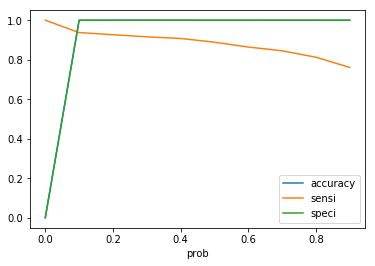

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [156]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000010,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000083,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000012,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000009,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000287,0,1,0,0,0,0,0,0,0,0,0,0


In [157]:
precision_score(y_train,y_train_pred_df['final_predicted'])

0.9371584699453552

In [158]:
recall_score(y_train,y_train_pred_df['final_predicted'])

0.9295392953929539

In [159]:
f1_score(y_train,y_train_pred_df['final_predicted'])

0.9333333333333335

In [160]:
y_test_pred_proba = random_search_unb.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [161]:
y_test_pred_proba[:,1]

array([5.0763229e-05, 5.5487868e-05, 1.7077320e-05, ..., 2.8864906e-05,
       5.7915639e-04, 4.4327287e-05], dtype=float32)

In [163]:
y_test_predicted=[1 if x>0.15 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [164]:
precision_score(y_test_predicted,y_test)

0.7967479674796748

In [165]:
recall_score(y_test_predicted,y_test)

0.8828828828828829

## Oversampling with SMOTE

In [35]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train_nor, y_train)

## 1. Logistic regression

In [38]:
#Lets build another logistic regression with top 15 features
logreg=LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_resampled,y_resampled)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[ True  True False  True  True  True False False  True  True  True  True
  True False  True False  True  True False False False False  True False
 False  True False False False False]
[ 1  1  4  1  1  1 16 15  1  1  1  1  1  7  1  8  1  1  3 12 14  6  1  5
  2  1 11 10  9 13]


In [39]:
# Getting the predicted values on the train set
y_resampled_pred = rfe.predict(X_resampled)
y_resampled_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
# Getting the predicted values on the test set
y_test_pred = rfe.predict(X_test_nor)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_resampled, y_resampled_pred)
confusion

array([[208077,   5159],
       [ 15239, 197997]], dtype=int64)

In [42]:
print(precision_score(y_resampled, y_resampled_pred))
print(recall_score(y_resampled, y_resampled_pred))
print(accuracy_score(y_resampled, y_resampled_pred))

0.9746057217113941
0.928534581402765
0.9521703652291358


In [43]:
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.06150341685649203
0.8780487804878049
0.9766439144967838
0.11495476317189994
0.9274316553995742


In [45]:
y_train_pred_proba = rfe.predict_proba(X_resampled)
y_train_pred = rfe.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [46]:
y_train_pred_df['Predicted']=y_train_pred

In [47]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026331,0,1,0,0,0,0,0,0,0,0,0
1,0,0.051682,0,1,0,0,0,0,0,0,0,0,0
2,0,0.019122,0,1,0,0,0,0,0,0,0,0,0
3,0,0.030490,0,1,0,0,0,0,0,0,0,0,0
4,0,0.019704,0,1,0,0,0,0,0,0,0,0,0


In [48]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.908289  0.986836  0.829743
0.2   0.2  0.941938  0.971909  0.911966
0.3   0.3  0.949732  0.950899  0.948564
0.4   0.4  0.951082  0.936760  0.965405
0.5   0.5  0.952170  0.928535  0.975806
0.6   0.6  0.951150  0.920276  0.982025
0.7   0.7  0.949049  0.910329  0.987769
0.8   0.8  0.945452  0.899454  0.991451
0.9   0.9  0.937529  0.880166  0.994893


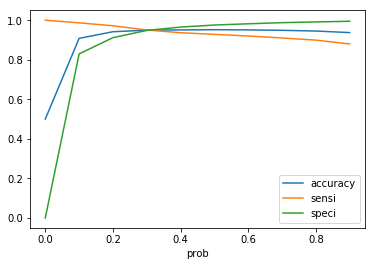

In [49]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [51]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026331,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.051682,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019122,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.030490,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.019704,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9486838780914595

In [55]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9508994728845036

In [56]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9497903833993021

In [57]:
y_test_pred_proba = rfe.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [58]:
y_test_pred_proba[:,1]

array([0.22038921, 0.02910713, 0.04739586, ..., 0.01967993, 0.33832289,
       0.03232781])

In [59]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

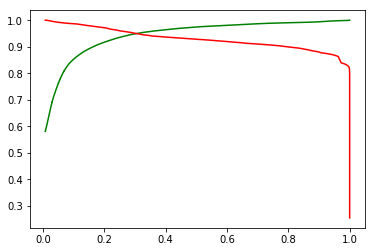

In [60]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [61]:
y_test_predicted=[1 if x>0.3 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [62]:
precision_score(y_test_predicted,y_test)

0.8943089430894309

In [63]:
recall_score(y_test_predicted,y_test)

0.0296655879180151

In [64]:
f1_score(y_test_predicted,y_test)

0.057426259462281394

In [65]:
confusion_matrix(y_test_predicted,y_test)

array([[67481,    13],
       [ 3598,   110]], dtype=int64)

## 2. Decision tree

In [66]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test_nor)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.83      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.90      0.53     71202
weighted avg       1.00      0.97      0.98     71202



In [68]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[68905  2174]
 [   21   102]]
0.9691722142636443
0.04481546572934974
0.8292682926829268


In [69]:
#now try rge decision tree with depth of 10

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 10 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=10)
dt_default.fit(X_resampled, y_resampled) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.12      0.71      0.20       123

    accuracy                           0.99     71202
   macro avg       0.56      0.85      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [71]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[70429   650]
 [   36    87]]
0.990365439173057
0.11804613297150611
0.7073170731707317


In [74]:
y_train_pred_proba = dt_default.predict_proba(X_resampled)
y_train_pred = dt_default.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [75]:
y_train_pred_df['Predicted']=y_train_pred

In [76]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
1,0,0.00000,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
3,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
4,0,0.00378,0,1,0,0,0,0,0,0,0,0,0


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.589321  1.000000  0.178642
0.1   0.1  0.989057  0.994462  0.983652
0.2   0.2  0.989057  0.994462  0.983652
0.3   0.3  0.989136  0.994405  0.983868
0.4   0.4  0.990933  0.990747  0.991118
0.5   0.5  0.990984  0.990414  0.991554
0.6   0.6  0.990942  0.989809  0.992075
0.7   0.7  0.990689  0.988839  0.992539
0.8   0.8  0.988135  0.981781  0.994490
0.9   0.9  0.984702  0.973400  0.996004


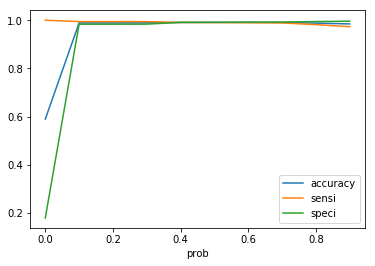

In [78]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [79]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.00000,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0


In [81]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9838267429398583

In [82]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9944615355756063

In [84]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.98911555423915

In [86]:
y_test_pred_proba = dt_default.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [87]:
y_test_pred_proba[:,1]

array([0.02228604, 0.00377994, 0.00377994, ..., 0.00377994, 0.00377994,
       0.00377994])

In [111]:
y_test_predicted=[1 if x>0.15 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [112]:
precision_score(y_test_predicted,y_test)

0.8130081300813008

In [113]:
recall_score(y_test_predicted,y_test)

0.07518796992481203

In [114]:
f1_score(y_test_predicted,y_test)

0.13764624913971094

In [115]:
confusion_matrix(y_test_predicted,y_test)

array([[69849,    23],
       [ 1230,   100]], dtype=int64)

In [ ]:
# GridSearchCV to find optimal max_depth

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_resampled,y_resampled)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
#Running the model with best parameters obtained from grid search.
# model with optimal hyperparameters
# clf_gini = DecisionTreeClassifier(criterion = "gini", 
#                                   random_state = 100,
#                                   max_depth=10, 
#                                   min_samples_leaf=50,
#                                   min_samples_split=50)

clf_gini = grid_search.best_estimator_


In [116]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [117]:
# accuracy score
clf_gini.score(X_test_nor,y_test)

0.9895789444116738

In [118]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.09      0.81      0.17       123

    accuracy                           0.99     71202
   macro avg       0.55      0.90      0.58     71202
weighted avg       1.00      0.99      0.99     71202



In [119]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[70429   650]
 [   36    87]]
0.990365439173057
0.11804613297150611
0.7073170731707317


In [121]:
y_train_pred_proba = clf_gini.predict_proba(X_resampled)
y_train_pred = clf_gini.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [122]:
y_train_pred_df['Predicted']=y_train_pred

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
1,0,0.00000,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
3,0,0.00378,0,1,0,0,0,0,0,0,0,0,0
4,0,0.00378,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.585103  1.000000  0.170206
0.1   0.1  0.985905  0.994340  0.977471
0.2   0.2  0.986653  0.994030  0.979276
0.3   0.3  0.987113  0.993556  0.980669
0.4   0.4  0.989132  0.989491  0.988773
0.5   0.5  0.989223  0.988581  0.989866
0.6   0.6  0.989073  0.987024  0.991123
0.7   0.7  0.988529  0.984679  0.992379
0.8   0.8  0.985361  0.975848  0.994874
0.9   0.9  0.981563  0.966586  0.996539


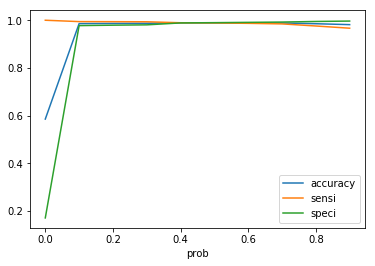

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [126]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.00000,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.00378,0,1,0,0,0,0,0,0,0,0,0,0


In [128]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9790192673600207

In [129]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9941520193588325

In [130]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9865276148992014

In [131]:
y_test_pred_proba = clf_gini.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [132]:
y_test_pred_proba[:,1]

array([0.02228604, 0.00377994, 0.00377994, ..., 0.00377994, 0.00377994,
       0.00377994])

In [136]:
y_test_predicted=[1 if x>0.15 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [137]:
precision_score(y_test_predicted,y_test)

0.8211382113821138

In [138]:
recall_score(y_test_predicted,y_test)

0.06139817629179331

In [139]:
f1_score(y_test_predicted,y_test)

0.11425339366515837

In [140]:
confusion_matrix(y_test_predicted,y_test)

array([[69535,    22],
       [ 1544,   101]], dtype=int64)

## 3. Random Forest

In [141]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
# Making predictions
predictions = rfc.predict(X_test_nor)

In [143]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.80      0.85       123

    accuracy                           1.00     71202
   macro avg       0.95      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [144]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[71067    12]
 [   24    99]]
0.9994943962248252
0.11804613297150611
0.7073170731707317


In [ ]:
#Grid Search to Find Optimal Hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
grid_search.best_params_

In [145]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [146]:
# fit
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
# predict
predictions = rfc.predict(X_test)

In [148]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.20      0.83      0.32       123

    accuracy                           0.99     71202
   macro avg       0.60      0.91      0.66     71202
weighted avg       1.00      0.99      1.00     71202

[[70662   417]
 [   21   102]]
0.9938484874020392
0.7073170731707317


In [149]:
y_train_pred_proba = rfc.predict_proba(X_resampled)
y_train_pred = rfc.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [150]:
y_train_pred_df['Predicted']=y_train_pred

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007227,0,1,0,0,0,0,0,0,0,0,0
1,0,0.076729,0,1,0,0,0,0,0,0,0,0,0
2,0,0.008036,0,1,0,0,0,0,0,0,0,0,0
3,0,0.009665,0,1,0,0,0,0,0,0,0,0,0
4,0,0.059628,0,1,0,0,0,0,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.944695  0.997421  0.891969
0.2   0.2  0.973489  0.993134  0.953845
0.3   0.3  0.984932  0.989575  0.980289
0.4   0.4  0.988546  0.984998  0.992093
0.5   0.5  0.986726  0.976922  0.996530
0.6   0.6  0.983563  0.968819  0.998307
0.7   0.7  0.974735  0.950351  0.999118
0.8   0.8  0.954979  0.910489  0.999470
0.9   0.9  0.942979  0.886243  0.999714


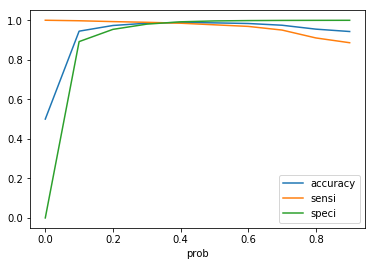

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [154]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.007227,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.076729,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.008036,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009665,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059628,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9804707828414244

In [158]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9895749310622972

In [159]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9850018205073147

In [160]:
y_test_pred_proba = rfc.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [161]:
y_test_pred_proba[:,1]

array([0.05929142, 0.01068728, 0.01238587, ..., 0.01017015, 0.08558124,
       0.01125132])

In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

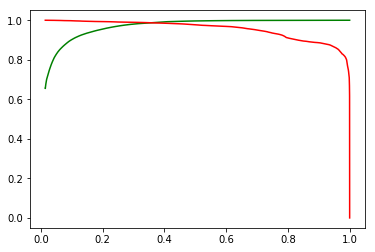

In [163]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [168]:
y_test_predicted=[1 if x>0.35 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [169]:
precision_score(y_test_predicted,y_test)

0.8536585365853658

In [170]:
recall_score(y_test_predicted,y_test)

0.1025390625

In [171]:
f1_score(y_test_predicted,y_test)

0.18308631211857018

In [172]:
confusion_matrix(y_test_predicted,y_test)

array([[70160,    18],
       [  919,   105]], dtype=int64)

## XGBoost

In [60]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [61]:
xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, objective='binary:logistic',
                    silent=True, nthread=1)

In [64]:
param_comb = 5
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X_resampled,y_resampled), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_resampled,y_resampled)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 107.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002CC6C4AB5E8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=None,
                                           min_child_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_

In [65]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
#results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.9999849212995073

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}


In [66]:
y_test_pred_proba = random_search.predict_proba(X_test_nor)


In [67]:
y_test_pred = random_search.predict(X_test_nor)


In [68]:
precision_score(y_test_pred,y_test)

0.7967479674796748

In [69]:
recall_score(y_test_pred,y_test)

0.784

In [70]:
f1_score(y_test_pred,y_test)

0.7903225806451615

In [75]:
y_test.dtype

dtype('int64')

In [126]:
y_train_pred_proba_smote = random_search.predict_proba(X_resampled)
y_train_pred_smote = random_search.predict(X_resampled)


y_train_pred_smote_df=pd.DataFrame({'Actual':list(y_resampled),'Churn_Prob':list(y_train_pred_proba_smote[:,1])})

In [128]:
y_train_pred_smote_df['Predicted']=y_train_pred_smote

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_smote_df[i]= y_train_pred_smote_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Churn_Prob
0,0,9.012560e-09
1,0,8.410736e-06
2,0,2.856559e-07
3,0,4.611529e-07
4,0,7.800184e-06


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_smote_df.Actual, y_train_pred_smote_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.999819  1.000000  0.999639
0.2   0.2  0.999960  1.000000  0.999920
0.3   0.3  0.999988  1.000000  0.999977
0.4   0.4  0.999993  1.000000  0.999986
0.5   0.5  0.999998  1.000000  0.999995
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  1.000000  1.000000  1.000000
0.9   0.9  0.999998  0.999995  1.000000


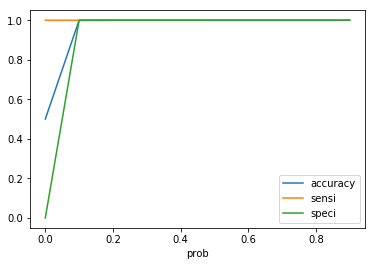

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
y_train_pred_smote_df['final_predicted'] = y_train_pred_smote_df.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_smote_df.head()

,Actual,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,9.012560e-09,0,1,0,0,0,0,0,0,0,0,0,0
1,0,8.410736e-06,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.856559e-07,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4.611529e-07,0,1,0,0,0,0,0,0,0,0,0,0
4,0,7.800184e-06,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
precision_score(y_resampled,y_train_pred_smote_df['final_predicted'])

0.9998265134358311

In [134]:
recall_score(y_resampled,y_train_pred_smote_df['final_predicted'])

1.0

In [135]:
f1_score(y_resampled,y_train_pred_smote_df['final_predicted'])

0.9999132491928658

In [136]:
y_test_pred_proba = random_search.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [137]:
y_test_pred_proba[:,1]

array([1.0449863e-04, 2.5287974e-07, 1.2127445e-06, ..., 1.6918577e-08,
       2.8734039e-05, 9.8722118e-08], dtype=float32)

In [138]:
y_test_predicted=[1 if x>0.1 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [139]:
precision_score(y_test_predicted,y_test)

0.8373983739837398

In [140]:
recall_score(y_test_predicted,y_test)

0.5228426395939086

## ADASYN oversampling

In [173]:
from imblearn.over_sampling import ADASYN

In [174]:
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_train_nor, y_train)

In [ ]:
## 1. Logistic regression

In [175]:
#Lets build another logistic regression with top 15 features

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe_ada = rfe.fit(X_resampled,y_resampled)
print(rfe_ada.support_)           # Printing the boolean results
print(rfe_ada.ranking_) 

[False  True  True  True  True False False False  True  True  True  True
  True False  True False  True  True False False False False  True  True
 False  True False False False False]
[ 2  1  1  1  1  3 13 14  1  1  1  1  1 16  1  9  1  1  5 10 15 11  1  1
  4  1 12  6  7  8]


In [176]:
# Getting the predicted values on the train set
y_resampled_pred =rfe_ada.predict(X_resampled)
y_resampled_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [177]:
# Getting the predicted values on the train set
y_resampled_pred =rfe_ada.predict(X_resampled)
y_resampled_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [178]:
# Getting the predicted values on the test set
y_test_pred =rfe_ada.predict(X_test_nor)
y_test_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [179]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_resampled, y_resampled_pred)
confusion

array([[194376,  18860],
       [ 22485, 190741]], dtype=int64)

In [180]:
print(precision_score(y_resampled, y_resampled_pred))
print(recall_score(y_resampled, y_resampled_pred))
print(accuracy_score(y_resampled, y_resampled_pred))

0.910019513265681
0.8945485072176939
0.9030511510990428


In [181]:
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.01769352290679305
0.9105691056910569
0.9125165023454397
0.03471253680458702
0.911544488972936


In [183]:
y_train_pred_proba = rfe_ada.predict_proba(X_resampled)
y_train_pred = rfe_ada.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [184]:
y_train_pred_df['Predicted']=y_train_pred

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063605,0,1,0,0,0,0,0,0,0,0,0
1,0,0.168928,0,1,1,0,0,0,0,0,0,0,0
2,0,0.037623,0,1,0,0,0,0,0,0,0,0,0
3,0,0.140677,0,1,1,0,0,0,0,0,0,0,0
4,0,0.320842,0,1,1,1,1,0,0,0,0,0,0


In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499988  1.000000  0.000000
0.1   0.1  0.801670  0.989307  0.614043
0.2   0.2  0.877630  0.975134  0.780131
0.3   0.3  0.898110  0.947502  0.848722
0.4   0.4  0.902610  0.920221  0.885001
0.5   0.5  0.903051  0.894549  0.911553
0.6   0.6  0.886553  0.837862  0.935241
0.7   0.7  0.865381  0.776345  0.954412
0.8   0.8  0.849093  0.728565  0.969616
0.9   0.9  0.823804  0.666420  0.981180


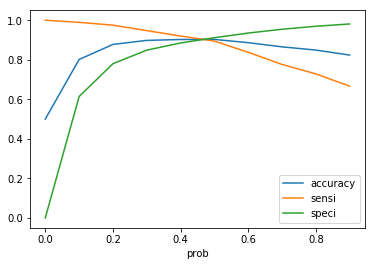

In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [188]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063605,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.168928,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.037623,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.140677,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.320842,0,1,1,1,1,0,0,0,0,0,0,0


In [190]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.910019513265681

In [191]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.8945485072176939

In [192]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9022176918692515

In [193]:
y_test_pred_proba = rfe_ada.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [194]:
y_test_pred_proba[:,1]

array([0.66479608, 0.06512324, 0.1118366 , ..., 0.07338661, 0.62978604,
       0.07802725])

In [195]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

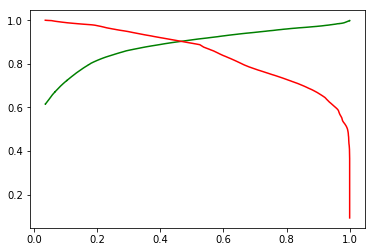

In [196]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [197]:
y_test_predicted=[1 if x>0.5 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [198]:
precision_score(y_test_predicted,y_test)

0.9105691056910569

In [199]:
recall_score(y_test_predicted,y_test)

0.01769352290679305

In [200]:
f1_score(y_test_predicted,y_test)

0.03471253680458702

In [201]:
confusion_matrix(y_test_predicted,y_test)

array([[64861,    11],
       [ 6218,   112]], dtype=int64)

In [ ]:
2. Decision tree

In [202]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default_ada = DecisionTreeClassifier(max_depth=5)
dt_default_ada.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [203]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test_nor)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.81      0.23       123

    accuracy                           0.99     71202
   macro avg       0.57      0.90      0.61     71202
weighted avg       1.00      0.99      0.99     71202



In [204]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[70442   637]
 [   23   100]]
0.9907305974551277
0.13568521031207598
0.8130081300813008


In [205]:
#now try rge decision tree with depth of 10

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 10 so that we can plot and read the tree.
dt_default_ada10 = DecisionTreeClassifier(max_depth=10)
dt_default_ada10.fit(X_resampled, y_resampled) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [206]:
# Making predictions
y_pred_default = dt_default_ada10.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.05      0.82      0.10       123

    accuracy                           0.97     71202
   macro avg       0.53      0.90      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [207]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[69199  1880]
 [   22   101]]
0.9732872672115952
0.05098435133770823
0.8211382113821138


In [208]:
y_train_pred_proba = dt_default_ada10.predict_proba(X_resampled)
y_train_pred = dt_default_ada10.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [209]:
y_train_pred_df['Predicted']=y_train_pred

In [210]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003444,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
2,0,0.041958,0,1,0,0,0,0,0,0,0,0,0
3,0,0.003444,0,1,0,0,0,0,0,0,0,0,0
4,0,0.003444,0,1,0,0,0,0,0,0,0,0,0


In [211]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.639286  1.000000  0.278588
0.1   0.1  0.973149  0.992154  0.954145
0.2   0.2  0.975742  0.991277  0.960208
0.3   0.3  0.975742  0.991277  0.960208
0.4   0.4  0.975749  0.991258  0.960241
0.5   0.5  0.976157  0.989241  0.963074
0.6   0.6  0.975869  0.987201  0.964537
0.7   0.7  0.974523  0.981006  0.968040
0.8   0.8  0.974378  0.980551  0.968204
0.9   0.9  0.960897  0.949617  0.972176


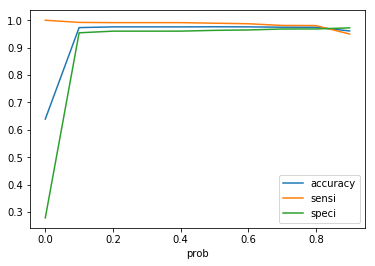

In [212]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [213]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.9 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003444,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.041958,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.003444,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003444,0,1,0,0,0,0,0,0,0,0,0,0


In [216]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9715328957469676

In [217]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9496168384718562

In [218]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9604498603080338

In [219]:
y_test_pred_proba = rfe_ada.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [220]:
y_test_pred_proba[:,1]

array([0.66479608, 0.06512324, 0.1118366 , ..., 0.07338661, 0.62978604,
       0.07802725])

In [221]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

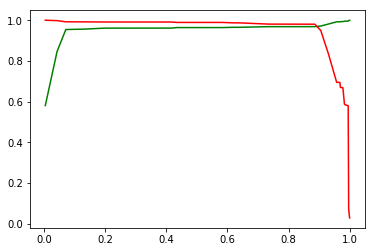

In [222]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [223]:
y_test_predicted=[1 if x>0.9 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [224]:
precision_score(y_test_predicted,y_test)

0.8617886178861789

In [225]:
recall_score(y_test_predicted,y_test)

0.07523066004258339

In [226]:
f1_score(y_test_predicted,y_test)

0.13838120104438642

In [227]:
confusion_matrix(y_test_predicted,y_test)

array([[69776,    17],
       [ 1303,   106]], dtype=int64)

In [ ]:
# GridSearchCV to find optimal max_depth

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt_ada = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search_dt_ada.fit(X_resampled,y_resampled)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search_dt_ada.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_dt_ada.best_score_)
print(grid_search_dt_ada.best_estimator_)

In [ ]:
#Running the model with best parameters obtained from grid search.
# model with optimal hyperparameters




In [ ]:
dt_grid_ada = grid_search_dt_ada.best_estimator_


In [228]:
dt_grid_ada = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_grid_ada.fit(X_resampled, y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [229]:
# accuracy score
dt_grid_ada.score(X_test_nor,y_test)

0.9698744417291649

In [230]:
y_pred = dt_grid_ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.05      0.83      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.90      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [231]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

[[69089  1990]
 [   21   102]]
0.9717564113367602
0.04875717017208413
0.8292682926829268


In [232]:
y_train_pred_proba = dt_grid_ada.predict_proba(X_resampled)
y_train_pred = dt_grid_ada.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [233]:
y_train_pred_df['Predicted']=y_train_pred

In [234]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [235]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.975724  1.000000  0.951448
0.1   0.1  0.983183  0.999597  0.966769
0.2   0.2  0.983771  0.999282  0.968261
0.3   0.3  0.984006  0.999048  0.968964
0.4   0.4  0.984503  0.998279  0.970727
0.5   0.5  0.984529  0.998058  0.970999
0.6   0.6  0.984505  0.997918  0.971093
0.7   0.7  0.984336  0.997261  0.971412
0.8   0.8  0.983905  0.996051  0.971759
0.9   0.9  0.943130  0.901396  0.984862


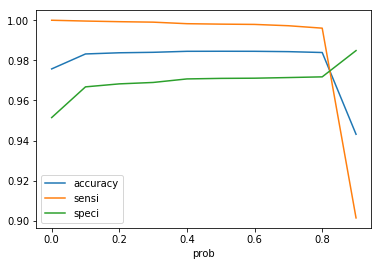

In [236]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [237]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.85 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [238]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9732304774880098

In [239]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9916520499376249

In [240]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9823549088476333

In [241]:
y_test_pred_proba = dt_grid_ada.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [242]:
y_test_pred_proba[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [243]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual, y_train_pred_df.Fraud_prob)

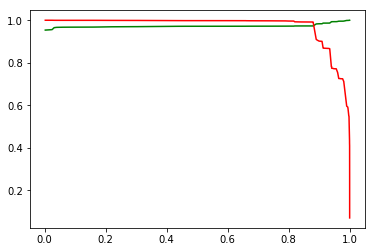

In [244]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [251]:
y_test_predicted=[1 if x>0.8 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [252]:
precision_score(y_test_predicted,y_test)

0.8536585365853658

In [253]:
recall_score(y_test_predicted,y_test)

0.04836480884385076

In [254]:
f1_score(y_test_predicted,y_test)

0.09154315605928509

In [255]:
confusion_matrix(y_test_predicted,y_test)

array([[69013,    18],
       [ 2066,   105]], dtype=int64)

In [ ]:
3. Random Forest

In [256]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [257]:
# Making predictions
predictions = rfc.predict(X_test_nor)

In [258]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.79      0.84       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [259]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(precision_score(y_test,y_pred_default))
print(recall_score(y_test,y_pred_default))

[[71067    12]
 [   26    97]]
0.9994663071262043
0.05098435133770823
0.8211382113821138


In [260]:
y_train_pred_proba = rfc.predict_proba(X_resampled)
y_train_pred = rfc.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [17]:
y_train_pred_df['Predicted']=y_train_pred

In [261]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00,0,0,0,0,0,0,0,0,0,0
1,0,0.00,0,0,0,0,0,0,0,0,0,0
2,0,0.00,0,0,0,0,0,0,0,0,0,0
3,0,0.00,0,0,0,0,0,0,0,0,0,0
4,0,0.01,1,0,0,0,0,0,0,0,0,0


In [262]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.971707  1.000000  0.943415
0.1   0.1  0.999747  1.000000  0.999494
0.2   0.2  0.999918  1.000000  0.999836
0.3   0.3  0.999979  1.000000  0.999958
0.4   0.4  0.999998  1.000000  0.999995
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  1.000000  1.000000  1.000000
0.9   0.9  0.999977  0.999953  1.000000


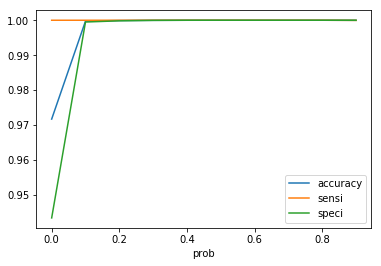

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [264]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00,0,0,0,0,0,0,0,0,0,0,0
1,0,0.00,0,0,0,0,0,0,0,0,0,0,0
2,0,0.00,0,0,0,0,0,0,0,0,0,0,0
3,0,0.00,0,0,0,0,0,0,0,0,0,0,0
4,0,0.01,1,0,0,0,0,0,0,0,0,0,0


In [266]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.9997421242398525

In [268]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

1.0

In [269]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9998710454928055

In [270]:
y_test_pred_proba = rfc.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [271]:
y_test_pred_proba[:,1]

array([0.02, 0.  , 0.  , ..., 0.  , 0.01, 0.  ])

In [294]:
y_test_predicted=[1 if x>0.6 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [295]:
precision_score(y_test_predicted,y_test)

0.7723577235772358

In [296]:
recall_score(y_test_predicted,y_test)

0.9223300970873787

In [297]:
f1_score(y_test_predicted,y_test)

0.8407079646017699

In [298]:
confusion_matrix(y_test_predicted,y_test)

array([[71071,    28],
       [    8,    95]], dtype=int64)

In [ ]:
#Grid Search to Find Optimal Hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
grid_search.best_params_

In [299]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [300]:
# fit
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [301]:
# predict
predictions = rfc.predict(X_test)

In [302]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.85      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.91      0.55     71202
weighted avg       1.00      0.98      0.99     71202

[[69532  1547]
 [   19   104]]
0.9780062357798939
0.8211382113821138


In [303]:
y_train_pred_proba = rfc.predict_proba(X_resampled)
y_train_pred = rfc.predict(X_resampled)


y_train_pred_df=pd.DataFrame({'Actual':list(y_resampled),'Fraud_prob':list(y_train_pred_proba[:,1])})

In [304]:
y_train_pred_df['Predicted']=y_train_pred

In [305]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010401,0,1,0,0,0,0,0,0,0,0,0
1,0,0.075977,0,1,0,0,0,0,0,0,0,0,0
2,0,0.023628,0,1,0,0,0,0,0,0,0,0,0
3,0,0.013109,0,1,0,0,0,0,0,0,0,0,0
4,0,0.173512,0,1,1,0,0,0,0,0,0,0,0


In [306]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499988  1.000000  0.000000
0.1   0.1  0.904735  0.999789  0.809685
0.2   0.2  0.952875  0.998874  0.906878
0.3   0.3  0.969376  0.994480  0.944273
0.4   0.4  0.977789  0.990686  0.964893
0.5   0.5  0.980685  0.982474  0.978897
0.6   0.6  0.978544  0.968864  0.988224
0.7   0.7  0.974324  0.955198  0.993449
0.8   0.8  0.961270  0.924972  0.997566
0.9   0.9  0.873281  0.747095  0.999461


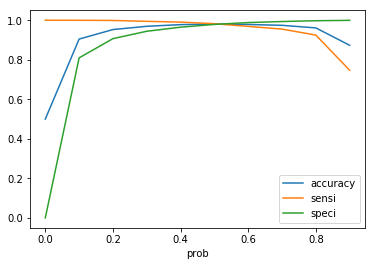

In [307]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [308]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Fraud_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_df.head()

,Actual,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010401,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.075977,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.023628,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.013109,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.173512,0,1,1,0,0,0,0,0,0,0,0,0


In [309]:
precision_score(y_resampled,y_train_pred_df['final_predicted'])

0.978970881680834

In [310]:
recall_score(y_resampled,y_train_pred_df['final_predicted'])

0.9824739947285979

In [311]:
f1_score(y_resampled,y_train_pred_df['final_predicted'])

0.9807193099493229

In [312]:
y_test_pred_proba = rfc.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [313]:
y_test_pred_proba[:,1]

array([0.16375889, 0.02510292, 0.01497249, ..., 0.01373607, 0.08771126,
       0.02994433])

In [326]:
y_test_predicted=[1 if x>0.5 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [327]:
precision_score(y_test_predicted,y_test)

0.8536585365853658

In [328]:
recall_score(y_test_predicted,y_test)

0.06587202007528231

In [329]:
f1_score(y_test_predicted,y_test)

0.12230634828188701

In [330]:
confusion_matrix(y_test_predicted,y_test)

array([[69590,    18],
       [ 1489,   105]], dtype=int64)

In [ ]:
## XGBoost

In [331]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [332]:
xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
param_comb = 5
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X_resampled,y_resampled), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_resampled,y_resampled)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [65]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
#results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

 Best normalized gini score for 5-fold search with 5 parameter combinations:
0.9999849212995073

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}


In [66]:
y_test_pred_proba = random_search.predict_proba(X_test_nor)


In [67]:
y_test_pred = random_search.predict(X_test_nor)


In [68]:
precision_score(y_test_pred,y_test)

0.7967479674796748

In [69]:
recall_score(y_test_pred,y_test)

0.784

In [70]:
f1_score(y_test_pred,y_test)

0.7903225806451615

In [75]:
y_test.dtype

dtype('int64')

In [126]:
y_train_pred_proba_smote = random_search.predict_proba(X_resampled)
y_train_pred_smote = random_search.predict(X_resampled)


y_train_pred_smote_df=pd.DataFrame({'Actual':list(y_resampled),'Churn_Prob':list(y_train_pred_proba_smote[:,1])})

In [128]:
y_train_pred_smote_df['Predicted']=y_train_pred_smote

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_smote_df[i]= y_train_pred_smote_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Churn_Prob
0,0,9.012560e-09
1,0,8.410736e-06
2,0,2.856559e-07
3,0,4.611529e-07
4,0,7.800184e-06


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#num=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_smote_df.Actual, y_train_pred_smote_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.999819  1.000000  0.999639
0.2   0.2  0.999960  1.000000  0.999920
0.3   0.3  0.999988  1.000000  0.999977
0.4   0.4  0.999993  1.000000  0.999986
0.5   0.5  0.999998  1.000000  0.999995
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  1.000000  1.000000  1.000000
0.9   0.9  0.999998  0.999995  1.000000


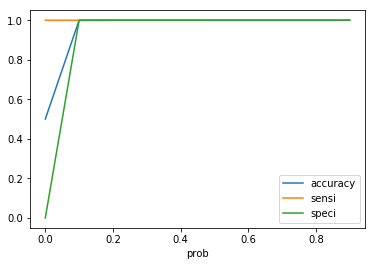

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [132]:
y_train_pred_smote_df['final_predicted'] = y_train_pred_smote_df.Churn_Prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_smote_df.head()

,Actual,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,9.012560e-09,0,1,0,0,0,0,0,0,0,0,0,0
1,0,8.410736e-06,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.856559e-07,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4.611529e-07,0,1,0,0,0,0,0,0,0,0,0,0
4,0,7.800184e-06,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
precision_score(y_resampled,y_train_pred_smote_df['final_predicted'])

0.9998265134358311

In [134]:
recall_score(y_resampled,y_train_pred_smote_df['final_predicted'])

1.0

In [135]:
f1_score(y_resampled,y_train_pred_smote_df['final_predicted'])

0.9999132491928658

In [136]:
y_test_pred_proba = random_search.predict_proba(X_test_nor)

#y_test_pred = random_search.predict(X_test_nor)


In [137]:
y_test_pred_proba[:,1]

array([1.0449863e-04, 2.5287974e-07, 1.2127445e-06, ..., 1.6918577e-08,
       2.8734039e-05, 9.8722118e-08], dtype=float32)

In [138]:
y_test_predicted=[1 if x>0.1 else 0 for x in y_test_pred_proba[:,1]]
#y_test_predicted=y_test_pred_proba[:,1].map( lambda x: 1 if x > 0.15 else 0)

In [139]:
precision_score(y_test_predicted,y_test)

0.8373983739837398

In [140]:
recall_score(y_test_predicted,y_test)

0.5228426395939086

In [64]:
param_comb = 5
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(X_resampled,y_resampled), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_resampled,y_resampled)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 107.2min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002CC6C4AB5E8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.3,
                                           max_delta_step=None, max_depth=None,
                                           min_child_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_

## From all above models we can say that XGBoost without oversampling has good scores on test data where precision is 0.79, recall is 0.90 and f1 score is 0.85